# **Machine Learning-based Prediction of Drug Efficacy Targeting FEN1 for Cancer Therapy**

Current idea: Targeting FEN1 has been verified as an effective strategy in mono or combined treatment of cancer. We will build machine learning models to predict the efficacy of potential drugs towards FEN1. In this notebook, we will encode the chemical structure using **PaDEL-Descriptor** and use **regression** approach to try to predict the exact values.

Reference: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9312813/

## **Collecting bioassay data**
We will collect bioassay data of FEN1 from PubChem database. Directly download the dataset from the website below.

https://pubchem.ncbi.nlm.nih.gov/bioassay/588795

In [1]:
# import library
import pandas as pd

df = pd.read_csv('/kaggle/input/aid588795/AID_588795_datatable_all.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (0,9,10,11,13,14,15,16,17,18,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## **Data pre-processing**

### **Data cleaning**

In [2]:
df.dropna(subset=['PUBCHEM_EXT_DATASOURCE_SMILES' ], inplace=True)
df.reset_index(drop=True, inplace=True)
df_sub = df[['PUBCHEM_CID', 'PUBCHEM_EXT_DATASOURCE_SMILES', 'PUBCHEM_ACTIVITY_OUTCOME', 'PUBCHEM_ACTIVITY_SCORE', 'Phenotype', 'Potency', 'Efficacy', 'Fit_LogAC50']]
display(df_sub)

,PUBCHEM_CID,PUBCHEM_EXT_DATASOURCE_SMILES,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,Phenotype,Potency,Efficacy,Fit_LogAC50
0,50897788.0,CNCC1=NC2=C(C=C(C=C2)Cl)C(=N1)C3=CC=CN3,Inconclusive,10.0,Inhibitor,79.4328,55.1668,-4.1
1,2733516.0,CCSC(=NC1=CC=C(C=C1)C(F)(F)F)N.Cl,Inactive,0.0,Inactive,NaN,NaN,NaN
2,4619591.0,CCN(CC1=CC(=CC=C1)S(=O)(=O)[O-])C2=CC=C(C=C2)C...,Active,40.0,Inhibitor,31.6228,118.129,-4.5
3,3240102.0,CC1=CC=CC=C1CN2C=NC3=C(C2=O)C=NN3C(C)(C)C,Inactive,0.0,Inactive,NaN,NaN,NaN
4,53314907.0,CC(C)(C)N1C2=C(C=N1)C(=O)N(C=N2)CC3=C(C(=CC=C3...,Inactive,0.0,Inactive,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
391248,655874.0,CC1CCC2=C(C1)SC(=N2)NC(=O)C3=CC(=NN3C)C(C)(C)C,Inactive,0.0,Inactive,NaN,NaN,NaN
391249,5745.0,CC(=O)OCC(=O)[C@]1(CC[C@@H]2[C@@]1(CC(=O)[C@H]...,Inactive,0.0,Inactive,NaN,NaN,NaN
391250,659648.0,COC1=CC2=C(C=C1)[N+](=O)C3=C(N2[O-])CCC3,Inactive,0.0,Inactive,NaN,NaN,NaN
391251,5389333.0,CCN(CC)CCN1C(/C(=C(/C2=CC=C(C=C2)C)\O)/C(=O)C1...,Inactive,0.0,Inactive,NaN,NaN,NaN


## **Our classification**

In [3]:
haha = []
for i in range(len(df_sub)):
    if df_sub.loc[i, 'Phenotype'] == 'Inhibitor':
        haha.append('Positive')
    else:
        haha.append('Negative')
        
df_sub['Inhibitor'] = haha
display(df_sub)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,PUBCHEM_CID,PUBCHEM_EXT_DATASOURCE_SMILES,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,Phenotype,Potency,Efficacy,Fit_LogAC50,Inhibitor
0,50897788.0,CNCC1=NC2=C(C=C(C=C2)Cl)C(=N1)C3=CC=CN3,Inconclusive,10.0,Inhibitor,79.4328,55.1668,-4.1,Positive
1,2733516.0,CCSC(=NC1=CC=C(C=C1)C(F)(F)F)N.Cl,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative
2,4619591.0,CCN(CC1=CC(=CC=C1)S(=O)(=O)[O-])C2=CC=C(C=C2)C...,Active,40.0,Inhibitor,31.6228,118.129,-4.5,Positive
3,3240102.0,CC1=CC=CC=C1CN2C=NC3=C(C2=O)C=NN3C(C)(C)C,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative
4,53314907.0,CC(C)(C)N1C2=C(C=N1)C(=O)N(C=N2)CC3=C(C(=CC=C3...,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative
...,...,...,...,...,...,...,...,...,...
391248,655874.0,CC1CCC2=C(C1)SC(=N2)NC(=O)C3=CC(=NN3C)C(C)(C)C,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative
391249,5745.0,CC(=O)OCC(=O)[C@]1(CC[C@@H]2[C@@]1(CC(=O)[C@H]...,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative
391250,659648.0,COC1=CC2=C(C=C1)[N+](=O)C3=C(N2[O-])CCC3,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative
391251,5389333.0,CCN(CC)CCN1C(/C(=C(/C2=CC=C(C=C2)C)\O)/C(=O)C1...,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative


### **Positive compounds**
We consider all active compounds and part of inconclusive compounds as positive compounds that can **inhibit FEN1**.

In [4]:
df_active = df_sub.loc[df_sub['PUBCHEM_ACTIVITY_OUTCOME'] == 'Active', :].reset_index(drop=True)
df_inconclusive = df_sub.loc[df_sub['PUBCHEM_ACTIVITY_OUTCOME'] == 'Inconclusive', :]
df_inconclusive_sampled = df_inconclusive.sample(n=len(df_active), random_state=0)
df_positive = pd.concat([df_active, df_inconclusive_sampled]).reset_index(drop=True)
display(df_positive)

,PUBCHEM_CID,PUBCHEM_EXT_DATASOURCE_SMILES,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,Phenotype,Potency,Efficacy,Fit_LogAC50,Inhibitor
0,4619591.0,CCN(CC1=CC(=CC=C1)S(=O)(=O)[O-])C2=CC=C(C=C2)C...,Active,40.0,Inhibitor,31.6228,118.129,-4.5,Positive
1,6623240.0,CC(C)(C)N1C2=C(C=N1)C(=O)N(C=N2)CC3=CC=C(C=C3)Cl,Active,80.0,Inhibitor,39.8107,93.9578,-4.4,Positive
2,16196968.0,CC1=CC(=C(C(=C1)O)OC2=CC(=CC(=C2O)O)C)O,Active,41.0,Inhibitor,50.1187,92.431,-4.3,Positive
3,160115.0,CC1CC(=O)C2=C(O1)C=C3C(=C2O)C(=CC(=C3C4=C(C=C(...,Active,82.0,Inhibitor,14.1254,101.357,-4.85,Positive
4,638759.0,C1=CC(=CC=C1C(=O)CCO)O,Active,81.0,Inhibitor,22.3872,97.3288,-4.65,Positive
...,...,...,...,...,...,...,...,...,...
2727,5286689.0,CC\1=NN(C(=O)/C1=C/C2=CC(=C(C=C2)OC)Br)C3=CC=C...,Inconclusive,10.0,Inhibitor,89.1251,67.6267,-4.05,Positive
2728,9593324.0,C1=CC(=CC=C1/C=N/NC(=O)C2=CC=C(C=C2)O)OCC(=O)N...,Inconclusive,21.0,Inhibitor,70.7946,72.0436,-4.15,Positive
2729,5345354.0,C1CC(OC1)CN2C(/C(=C(\C3=CC=CC=C3)/O)/C(=O)C2=O...,Inconclusive,10.0,Inhibitor,17.7828,27.2198,-4.75,Positive
2730,9550178.0,CCN(CC)CCNC1=NC2=CC(=C(C=C2C3=NC(=NN31)C4=CC=C...,Inconclusive,22.0,Inhibitor,3.9811,46.348,-5.4,Positive


### **Negative compounds**
We consider all inactive compounds as negative compounds, which are either **activator** or have **no effect on FEN1**. To balance the data, we will randomly sample from the negative compounds and choose a number of negative compounds equal to the number of positive compounds in the dataset.

In [5]:
df_negative = df_sub.loc[df_sub['Inhibitor'] == 'Negative', :].reset_index(drop=True)
display(df_negative)

,PUBCHEM_CID,PUBCHEM_EXT_DATASOURCE_SMILES,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,Phenotype,Potency,Efficacy,Fit_LogAC50,Inhibitor
0,2733516.0,CCSC(=NC1=CC=C(C=C1)C(F)(F)F)N.Cl,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative
1,3240102.0,CC1=CC=CC=C1CN2C=NC3=C(C2=O)C=NN3C(C)(C)C,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative
2,53314907.0,CC(C)(C)N1C2=C(C=N1)C(=O)N(C=N2)CC3=C(C(=CC=C3...,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative
3,44142107.0,CC1=C(C(=C(C=C1)F)CN2C=NC3=C(C2=O)C=NN3C(C)(C)...,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative
4,53314908.0,CC(C)(C)N1C2=C(C=N1)C(=O)N(C=N2)CC3=C(C=CC(=C3...,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative
...,...,...,...,...,...,...,...,...,...
382224,655874.0,CC1CCC2=C(C1)SC(=N2)NC(=O)C3=CC(=NN3C)C(C)(C)C,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative
382225,5745.0,CC(=O)OCC(=O)[C@]1(CC[C@@H]2[C@@]1(CC(=O)[C@H]...,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative
382226,659648.0,COC1=CC2=C(C=C1)[N+](=O)C3=C(N2[O-])CCC3,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative
382227,5389333.0,CCN(CC)CCN1C(/C(=C(/C2=CC=C(C=C2)C)\O)/C(=O)C1...,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative


In [6]:
df_negative_sampled = df_negative.sample(n=len(df_active), random_state=0).reset_index(drop=True)
display(df_negative_sampled)

,PUBCHEM_CID,PUBCHEM_EXT_DATASOURCE_SMILES,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,Phenotype,Potency,Efficacy,Fit_LogAC50,Inhibitor
0,5309773.0,CCN(CC)C(=O)C1CCC(CC1)CNS(=O)(=O)C2=CC=CC3=C2N...,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative
1,9622798.0,C1CC(C(=O)NC1)C(=O)N/N=C/C2=CC(=CC=C2)[N+](=O)...,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative
2,1292315.0,C1=CC=C(C=C1)C(C2=CC=CC=C2)NC(=O)C3=CC=C(O3)Br,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative
3,16032653.0,CC1=CC(=C2C(=C1)SC(=N2)N3CCN(CC3)C(=O)C4=CC5=C...,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative
4,16008216.0,CC1=CC(=C(C=C1)NC(=O)CN(C2=CC(=CC(=C2)C)C)S(=O...,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative
...,...,...,...,...,...,...,...,...,...
1361,2948675.0,C1CC(OC1)CNC(=O)C2=CC=C(C=C2)NC(=O)C3=CC=C(C=C...,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative
1362,5344764.0,CCOC1=C(C=CC(=C1)/C=C(\C#N)/C(=O)NCC2CCCO2)O,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative
1363,16023553.0,COCCNC1=C2C(=NOC2=NC=N1)C3=CC=C(C=C3)F,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative
1364,53315068.0,CC(=O)NNC(=C)C1=CC=C(C=C1)O,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative


## **Data processing**

In [7]:
df_sample = pd.concat([df_active, df_negative_sampled]).reset_index(drop=True)
# df_sample = pd.concat([df_positive, df_negative_sampled]).reset_index(drop=True)
df_sample

,PUBCHEM_CID,PUBCHEM_EXT_DATASOURCE_SMILES,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,Phenotype,Potency,Efficacy,Fit_LogAC50,Inhibitor
0,4619591.0,CCN(CC1=CC(=CC=C1)S(=O)(=O)[O-])C2=CC=C(C=C2)C...,Active,40.0,Inhibitor,31.6228,118.129,-4.5,Positive
1,6623240.0,CC(C)(C)N1C2=C(C=N1)C(=O)N(C=N2)CC3=CC=C(C=C3)Cl,Active,80.0,Inhibitor,39.8107,93.9578,-4.4,Positive
2,16196968.0,CC1=CC(=C(C(=C1)O)OC2=CC(=CC(=C2O)O)C)O,Active,41.0,Inhibitor,50.1187,92.431,-4.3,Positive
3,160115.0,CC1CC(=O)C2=C(O1)C=C3C(=C2O)C(=CC(=C3C4=C(C=C(...,Active,82.0,Inhibitor,14.1254,101.357,-4.85,Positive
4,638759.0,C1=CC(=CC=C1C(=O)CCO)O,Active,81.0,Inhibitor,22.3872,97.3288,-4.65,Positive
...,...,...,...,...,...,...,...,...,...
2727,2948675.0,C1CC(OC1)CNC(=O)C2=CC=C(C=C2)NC(=O)C3=CC=C(C=C...,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative
2728,5344764.0,CCOC1=C(C=CC(=C1)/C=C(\C#N)/C(=O)NCC2CCCO2)O,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative
2729,16023553.0,COCCNC1=C2C(=NOC2=NC=N1)C3=CC=C(C=C3)F,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative
2730,53315068.0,CC(=O)NNC(=C)C1=CC=C(C=C1)O,Inactive,0.0,Inactive,NaN,NaN,NaN,Negative


### **Download PaDEL-Descriptor**

In [8]:
# ! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
# ! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh
# ! unzip padel.zip

In [9]:
# selection = ['PUBCHEM_EXT_DATASOURCE_SMILES','PUBCHEM_CID']
# df_sub_selection = df_sample[selection]
# df_sub_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [10]:
# ! cat molecule.smi | head -5

In [11]:
# ! bash padel.sh

In [12]:
X = pd.read_csv('/kaggle/input/aid588795/descriptors_output.csv')
X = X.drop(columns=['Name'])
display(X)

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2727,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2728,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2729,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2730,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [13]:
## Removes all low variance features
from sklearn.feature_selection import VarianceThreshold

selection = VarianceThreshold(0.05)
X = selection.fit_transform(X)
X.shape

(2732, 336)

In [14]:
# y = df_sample['Fit_LogAC50'].fillna(-1).astype(float)
y = df_sample['Efficacy'].fillna(0).astype(float)
display(y)

0       118.1290
1        93.9578
2        92.4310
3       101.3570
4        97.3288
          ...   
2727      0.0000
2728      0.0000
2729      0.0000
2730      0.0000
2731      0.0000
Name: Efficacy, Length: 2732, dtype: float64

<AxesSubplot:xlabel='Efficacy', ylabel='Count'>

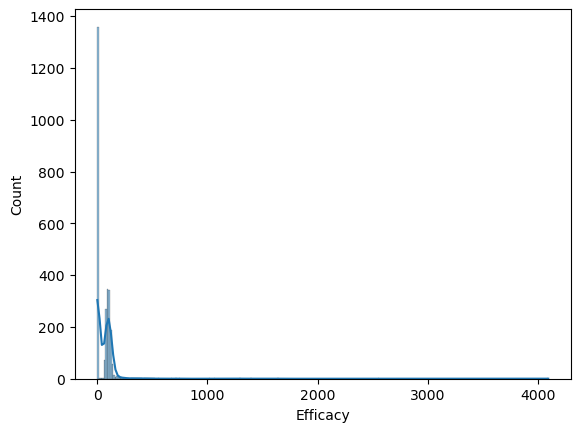

In [15]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.histplot(x=y, kde=True)

## **Model training**

### **Spliting dataset**
We split the whole data into three sets (train, validation, and test) with ratio 0.8:0.1:0.1.

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

### **Fitting models**

In [17]:
## Construct models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

svr_lin = SVR(kernel = "linear")
svr_lin.fit(X_train, y_train)

svr_rbf = SVR(kernel = "rbf")
svr_rbf.fit(X_train, y_train)

ridge = Ridge(alpha=1.0, random_state=0)
ridge.fit(X_train, y_train)

rf_reg = RandomForestRegressor(n_estimators = 500,random_state=0)
rf_reg.fit(X_train, y_train)

gbr = GradientBoostingRegressor(random_state=0)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [18]:
## Measure model performance
from sklearn.metrics import mean_squared_error, r2_score
mse_ls = []
r2_ls = []

models = [lin_reg, svr_lin, svr_rbf, ridge, rf_reg, gbr]

for model in models:
    y_pred = model.predict(X_test)
    if model == lin_reg:
        y_pred_lin_reg = y_pred
    elif model == svr_lin:
        y_pred_svr_lin = y_pred
    elif model == svr_rbf:
        y_pred_svr_rbf = y_pred
    elif model == ridge:
        y_pred_ridge = y_pred
    elif model == rf_reg:
        y_pred_rf = y_pred
    else:
        y_pred_gbr = y_pred
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    mse_ls.append(mse)
    r2_ls.append(r2)

df_acc_met = pd.DataFrame(list(zip(['Linear Regression', 'SVR Linear', 'SVR rbf', 'Ridge', 'Random forest', 'Gradient boosting'], mse_ls, r2_ls)), 
                                   columns = ['Model', 'MSE', 'R^2'])
df_acc_met

,Model,MSE,R^2
0,Linear Regression,6.844824e+19,-8.950063e+15
1,SVR Linear,6.116636e+03,2.002091e-01
2,SVR rbf,7.124796e+03,6.838547e-02
3,Ridge,7.979488e+03,-4.337127e-02
4,Random forest,6.266466e+03,1.806178e-01
5,Gradient boosting,6.524463e+03,1.468830e-01


In [19]:
! pip install dataframe-image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 43.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.7/399.7 kB 23.4 MB/s eta 0:00:00


In [20]:
import dataframe_image as dfi

dfi.export(df_acc_met, 'df_acc_met.png', table_conversion='matplotlib')

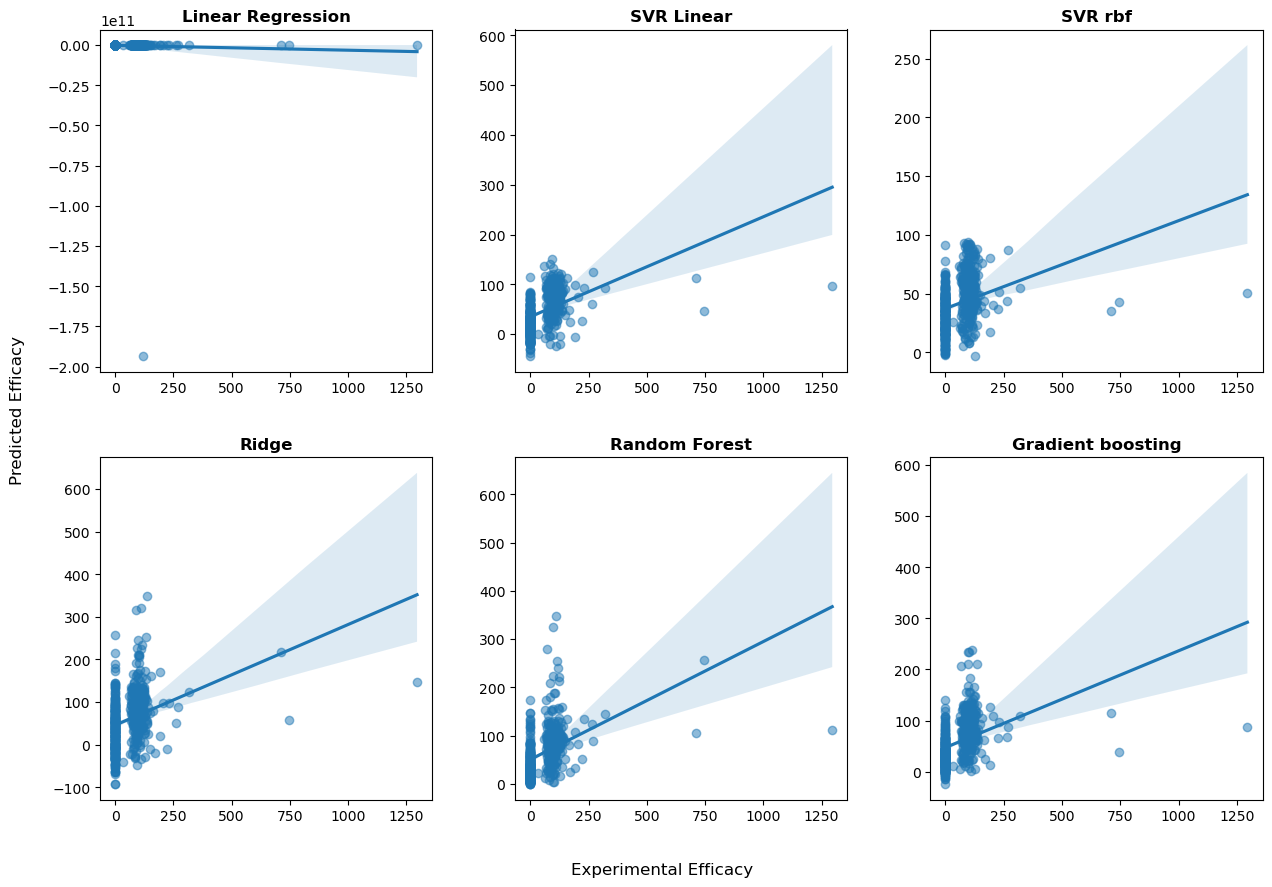

In [21]:
## Plot scatter plots of experimental vs predicted pEC50 values
from matplotlib import pyplot as plt

fig, axes = plt.subplots(2, 3)
fig.set_size_inches(15, 10)
fig.subplots_adjust(hspace=0.25, wspace=0.25)

ax1 = sns.regplot(x = y_test, y = y_pred_lin_reg, scatter_kws = {'alpha' : 0.5}, ax = axes[0, 0]);
ax1.set_title('Linear Regression', weight = 'bold')
ax1.set(xlabel=None)

ax2 = sns.regplot(x = y_test, y = y_pred_svr_lin, scatter_kws = {'alpha' : 0.5}, ax = axes[0, 1]);
ax2.set_title('SVR Linear', weight = 'bold')
ax2.set(xlabel=None)

ax3 = sns.regplot(x = y_test, y = y_pred_svr_rbf, scatter_kws = {'alpha' : 0.5}, ax = axes[0, 2]);
ax3.set_title('SVR rbf', weight = 'bold')
ax3.set(xlabel=None)

ax4 = sns.regplot(x = y_test, y = y_pred_ridge, scatter_kws = {'alpha' : 0.5}, ax = axes[1, 0]);
ax4.set_title('Ridge', weight = 'bold')
ax4.set(xlabel=None)

ax5 = sns.regplot(x = y_test, y = y_pred_rf, scatter_kws = {'alpha' : 0.5}, ax = axes[1, 1]);
ax5.set_title('Random Forest', weight = 'bold')
ax5.set(xlabel=None)

ax6 = sns.regplot(x = y_test, y = y_pred_gbr, scatter_kws = {'alpha' : 0.5}, ax = axes[1, 2]);
ax6.set_title('Gradient boosting', weight = 'bold')
ax6.set(xlabel=None)

fig.text(0.5, 0.04, "Experimental Efficacy", ha="center", va="center", fontsize=12)
fig.text(0.07, 0.5, "Predicted Efficacy", ha="center", va="center", rotation=90, fontsize=12)
plt.savefig('model_regplot.png')
plt.show()